### Visiualization of melespectogram

In [15]:
import os 
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [16]:
random_file_name ="./blues.00000.wav"

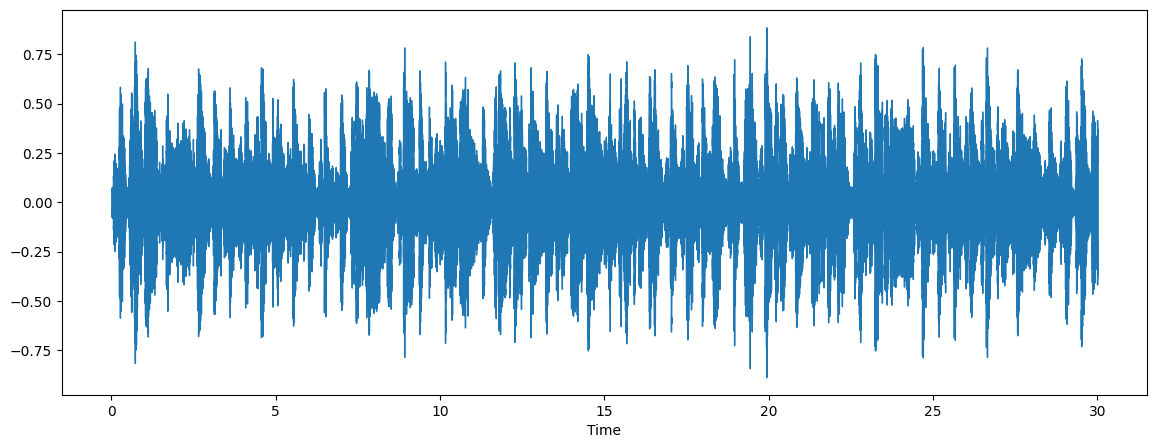

In [17]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [18]:
from IPython.display import Audio
Audio (data=y,rate=sr)

### Doing visiualization of chunks of audio 

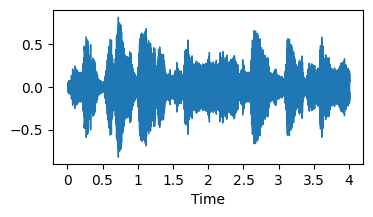

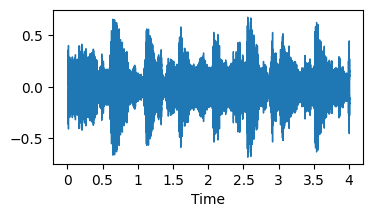

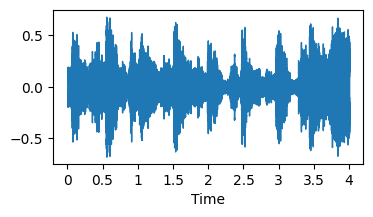

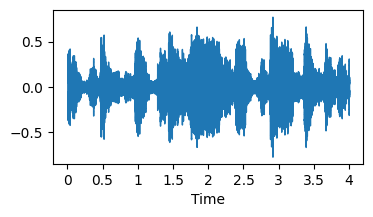

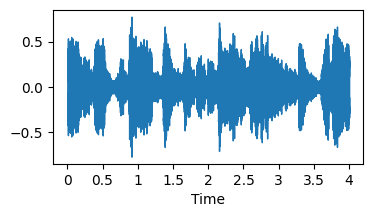

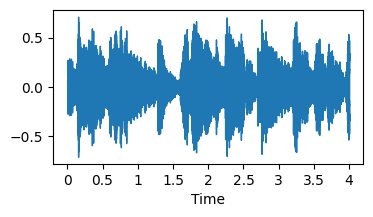

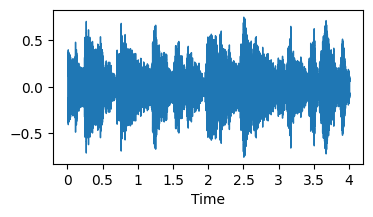

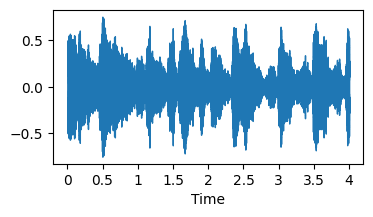

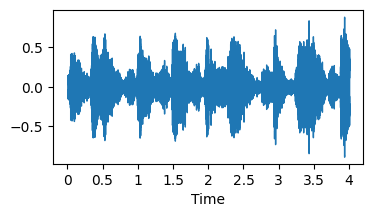

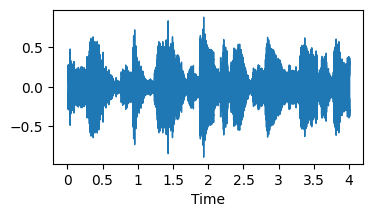

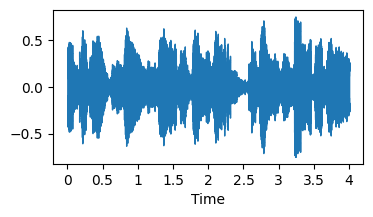

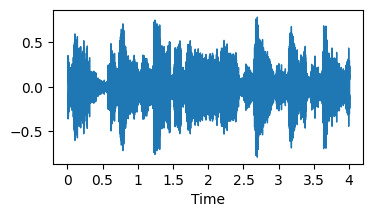

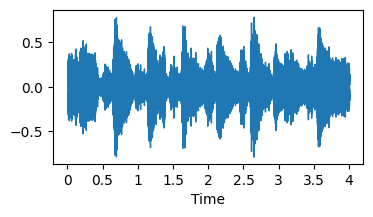

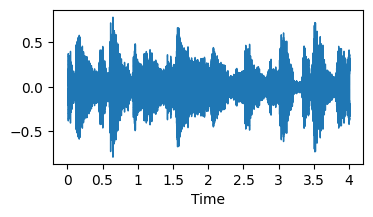

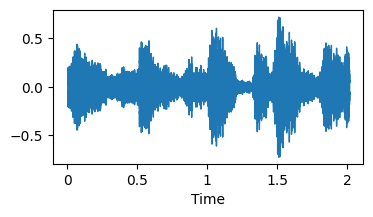

In [19]:
audio_path = "./blues.00000.wav"
y, sr = librosa.load(random_file_name, sr=None)  # sr=None to keep original sampling rate

# define the duration of each chunk and overlap
chunk_duration = 4
overlap_duration = 2

# Convert duration to sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start+chunk_samples
    #extract chunk audio
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show() 

### Melespectogram visiualization

In [20]:
# Plotting Melspectrogram of Entire Audio
def plot_melspectrogram(y, sr):
    # Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    
    # Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    
    # Visualize the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB') # here if we comment this line then we will not get right side which is in db
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()


In [21]:
random_file_name ="./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

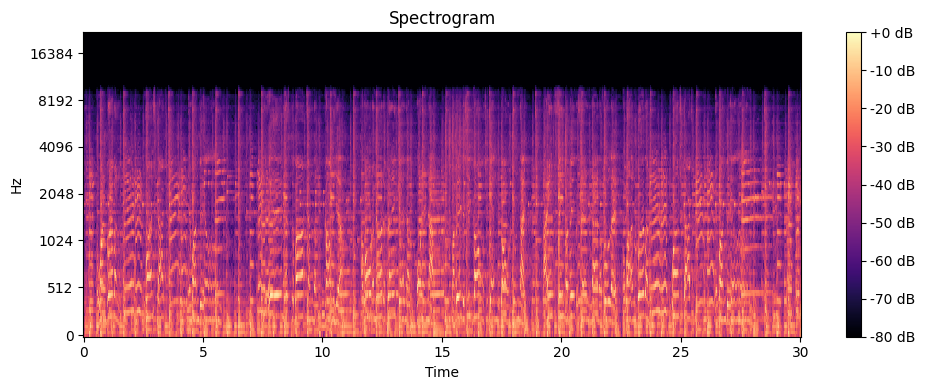

In [22]:
plot_melspectrogram(y, sr)

In [23]:
def plot_melspectrogram_chunks(y, sr):
    # Define duration of each chunk and overlap (in seconds)
    chunk_duration = 4
    overlap_duration = 2

    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    # Calculate number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
        
        # Extract chunk
        chunk = y[start:end]

        #  melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

        # Plot
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()


In [24]:
random_file_name = "./blues.00000.wav"
y, sr = librosa.load(random_file_name, sr=44100)

(128, 345)


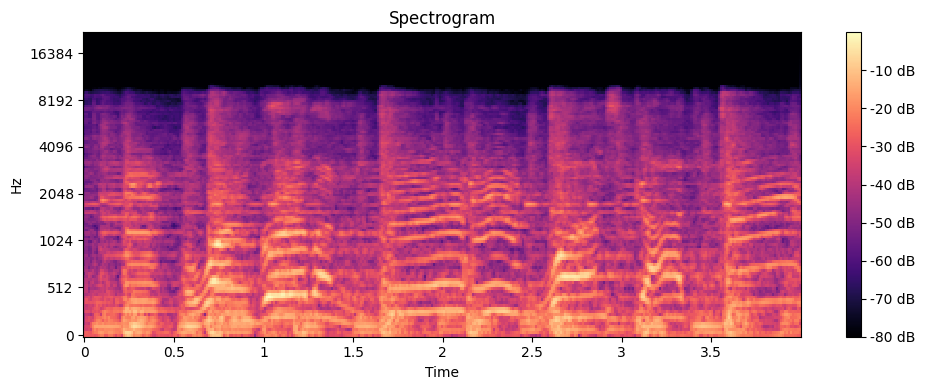

(128, 345)


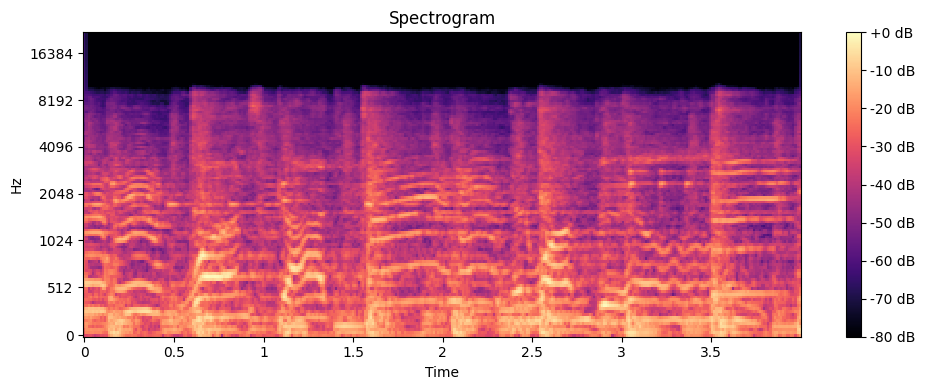

(128, 345)


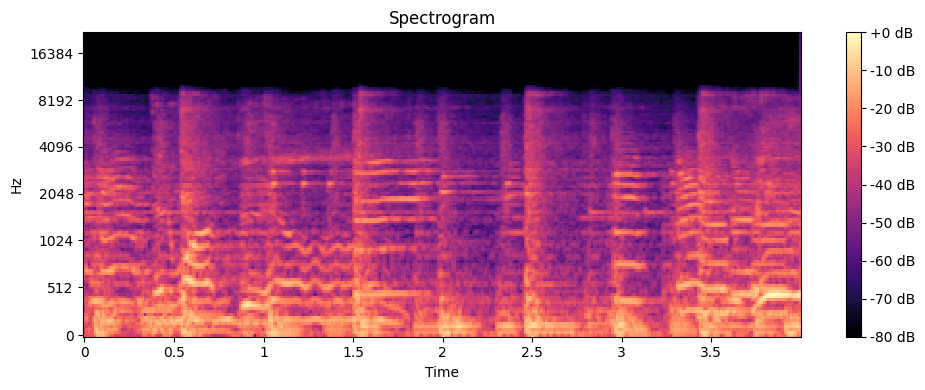

(128, 345)


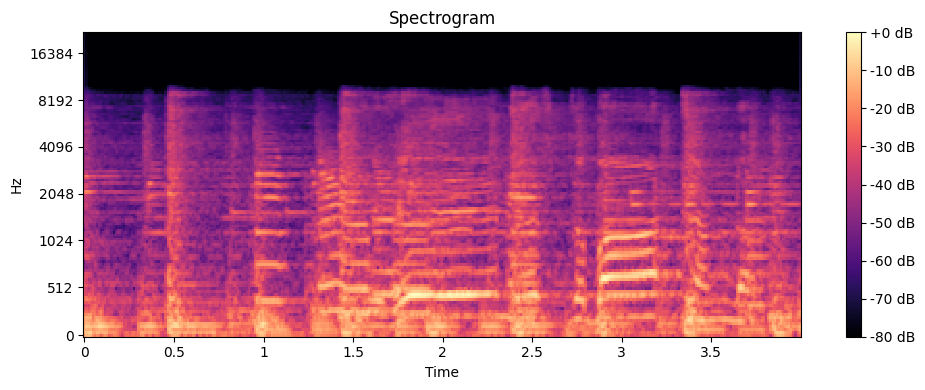

(128, 345)


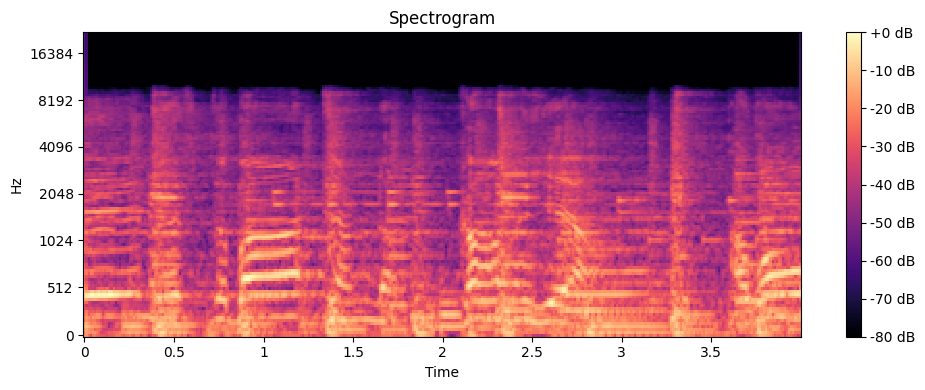

(128, 345)


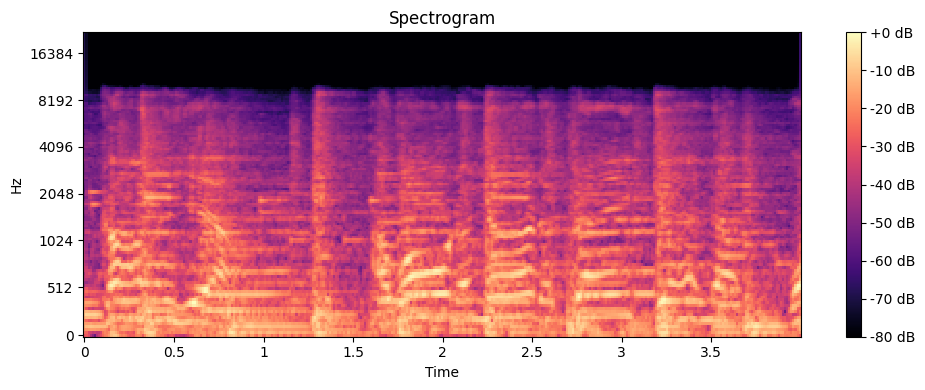

(128, 345)


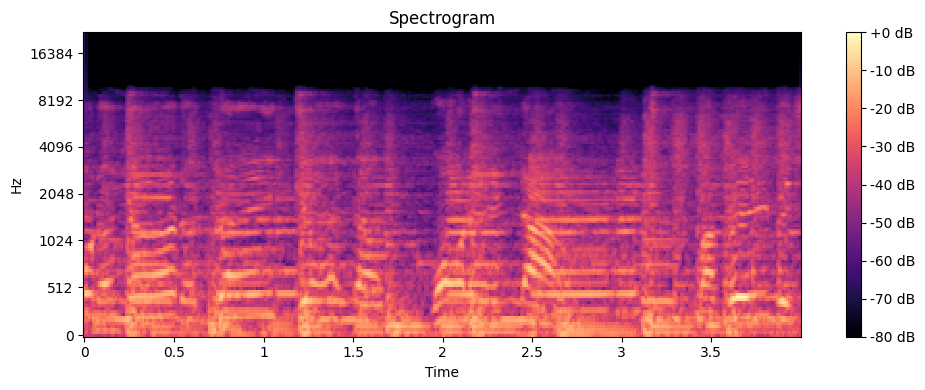

(128, 345)


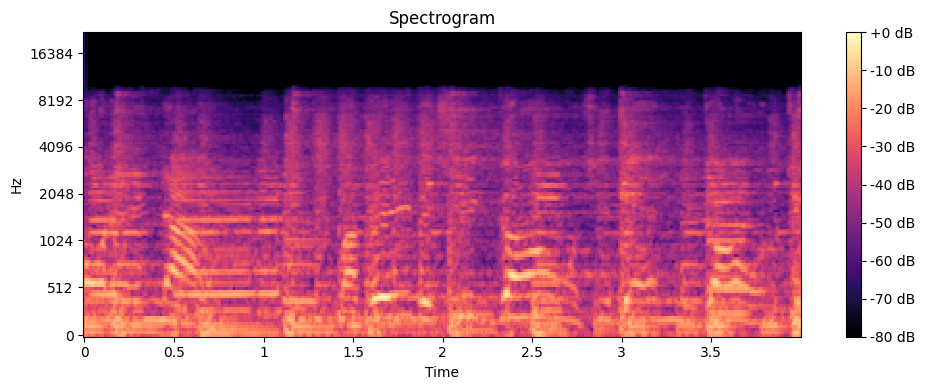

(128, 345)


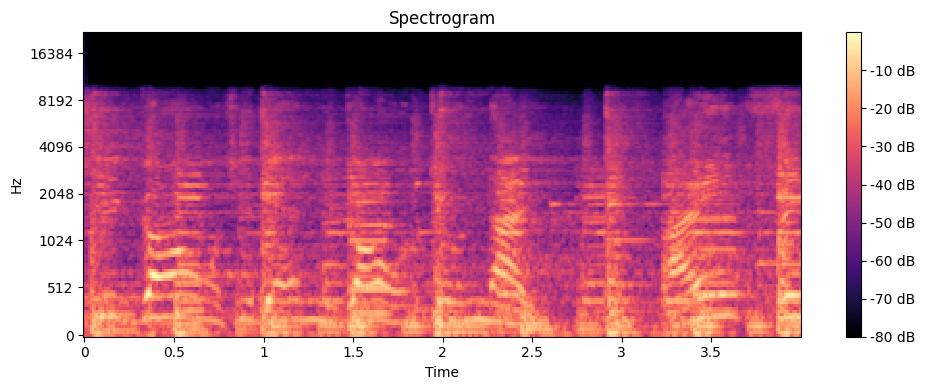

(128, 345)


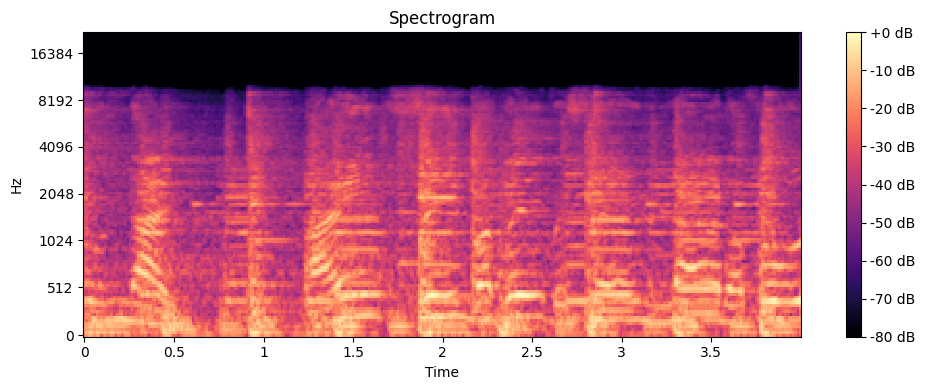

(128, 345)


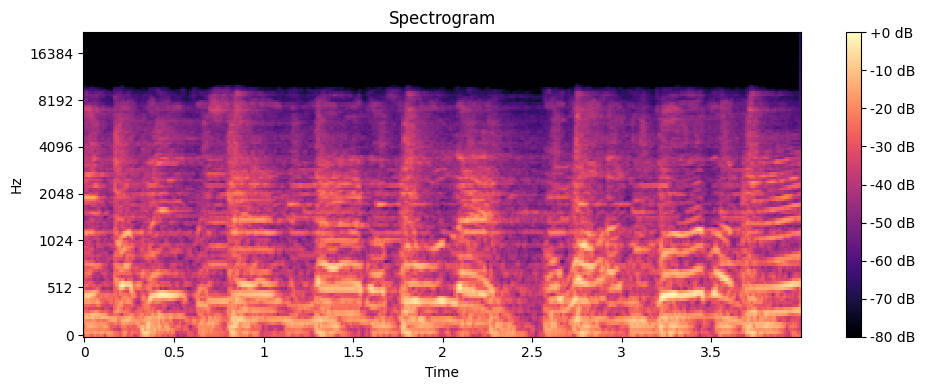

(128, 345)


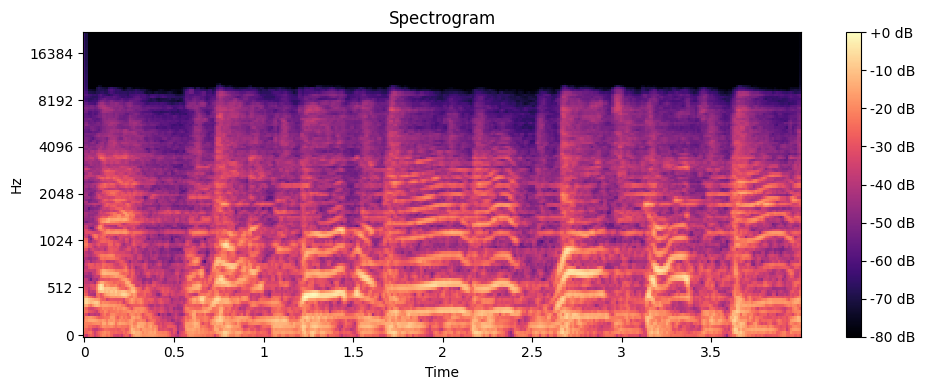

(128, 345)


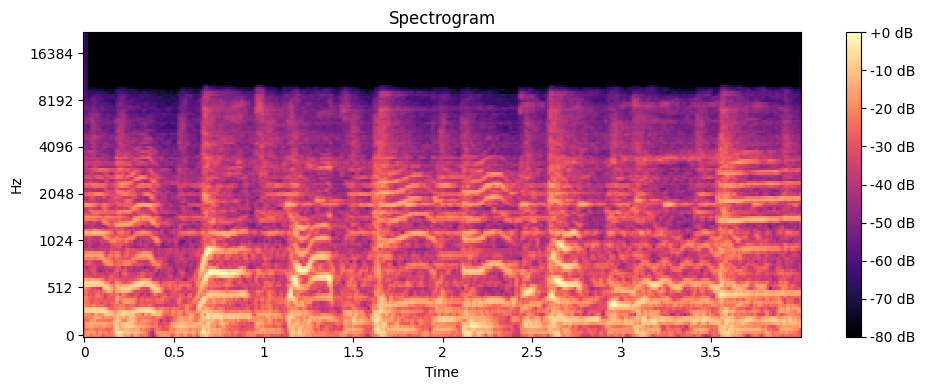

(128, 345)


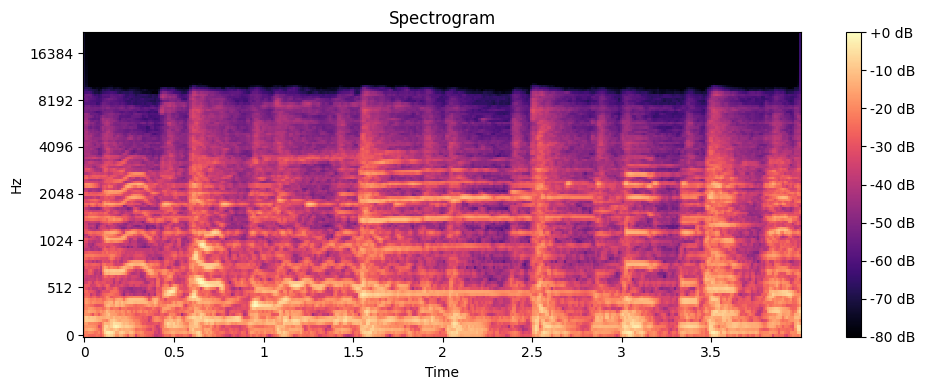

(128, 174)


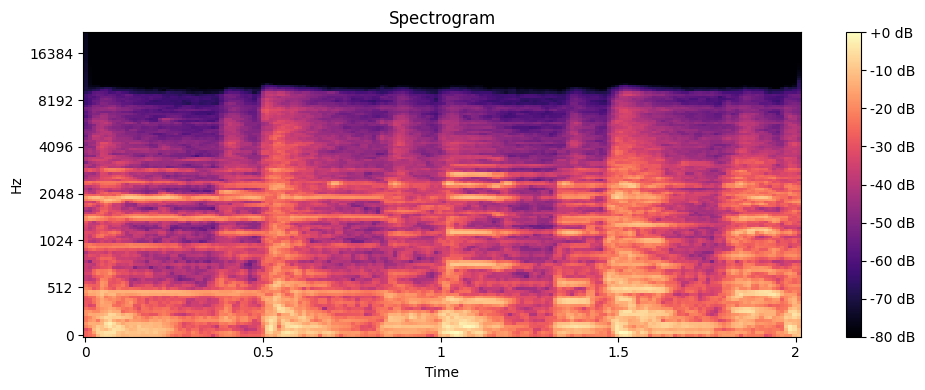

In [25]:
plot_melspectrogram_chunks(y, sr)

## Data Preprocessing - Final

In [26]:
# Define your folder structure
data_dir = './genres_original'
classes = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [27]:
from tensorflow.image import resize

# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing...", class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)

                # Performing Preprocessing
                # Define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2

                # Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples))) + 1

                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples

                    # Extract the chunk audio
                    chunk = audio_data[start:end]

                    # Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)

                    # Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)

                    # Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    # Return
    return np.array(data), np.array(labels)

In [28]:
data, labels = load_and_preprocess_data(data_dir, classes)

Processing... blues
Processing... classical
Processing... country
Processing... disco
Processing... hiphop
Processing... jazz
Processing... metal
Processing... pop
Processing... reggae
Processing... rock


In [29]:
data.shape

(14975, 150, 150, 1)

In [30]:
labels.shape

(14975,)

In [31]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes=len(classes))  # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [32]:
labels.shape

(14975, 10)

In [33]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Splitting of dataset into training and test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## Building Model

In [36]:
model = tf.keras.models.Sequential()

In [37]:
X_train[0].shape

(150, 150, 1)

In [38]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [39]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [40]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [41]:
model.add(Dropout(0.3))

In [42]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [43]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [44]:
model.add(Dropout(0.3))

In [45]:
model.add(Flatten())

In [46]:
model.add(Dense(units=1200, activation='relu'))

In [47]:
model.add(Dropout(0.45))

In [48]:
# Output layer
model.add(Dense(units=len(classes), activation='softmax'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training Model
training_history = model.fit(X_train, Y_train,
                             epochs=30,
                             batch_size=32,
                             validation_data=(X_test, Y_test))


Epoch 1/30
112/375 [=======>......................] - ETA: 26:04 - loss: 2.1822 - accuracy: 0.1900

In [ ]:
model.save("Trained_model.keras")
model.save("Trained_model.h5")